### Faculdade de Engenharia Industrial - FEI

### Centro Universitário da Fundação Educacional Inaciana "Padre Sabóia de Medeiros" (FEI)


*FEI's Stricto Sensu Graduate Program in Electrical Engineering*

Concentration area: ARTIFICIAL INTELLIGENCE APPLIED TO AUTOMATION AND ROBOTICS

Master's thesis student Andre Luiz Florentino

***

## Check for GPU

In [1]:
import tensorflow as tf
print(tf.__version__)

pd = tf.config.experimental.list_physical_devices()
for i in pd:
    print(i)
print('------------------------------------------------------------------------------------------')


print(tf.config.list_physical_devices('GPU'))
# [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

print(tf.test.is_built_with_cuda)
# <function is_built_with_cuda at 0x000001AA24AFEC10>

print(tf.test.gpu_device_name())
# /device:GPU:0

#gvd = tf.config.get_visible_devices()
for j in tf.config.get_visible_devices():
    print(j)
# PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
# PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

2.3.0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')
------------------------------------------------------------------------------------------
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
<function is_built_with_cuda at 0x0000019B541210D0>
/device:GPU:0
PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')
PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


# Chapter 8: Feature extraction for CNN 2D (Convolutional Neural Network)

***

## Import modules

In [2]:
import librosa
import librosa.display
import os
import warnings
import random
import mimetypes


import pandas     as pd
import seaborn    as sns
import numpy      as np
import IPython.display as ipd

from random import sample

from matplotlib  import pyplot  as plt

from tqdm                        import tqdm

In [3]:
# Globals
current_path = os.getcwd()

# For the picture names
pic_first_name = '08_Feature_extraction_for_CNN_2D_agg_'

# For Librosa
FRAME_SIZE  = 1024
HOP_LENGTH  = 512
SEED        = 1000
SR          = 22050
N_FTT       = 2048
BANDS       = 60

# Values for feature extraction
threshold   = 60
frames      = 44

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 300)
pd.set_option('display.max_colwidth', 120)

tf.random.set_seed(SEED)
np.random.seed(SEED)

mimetypes.init()
mimetypes.add_type('audio/ogg','.ogg')

## Loading the dataset

In [5]:
# Select the dataset

opcD = 0
while str(opcD) not in '1234':
    print()
    print("1-) ESC-10")
    print("2-) BDLib2")
    print("3-) US8K")
    print("4-) US8K_AV")

    opcD = input("\nSelect the dataset: ")
    if opcD.isdigit():
        opcD = int(opcD)
    else:
        opcD = 0

if opcD == 1:

    path        = os.path.join(current_path, "_dataset", "ESC-10")
    path_pic    = os.path.join(current_path, "ESC-10_results")
    path_models = os.path.join(current_path, "ESC-10_saved_models")
    
    # Check if the folder exists, if not, create it
    if not os.path.exists(path_models):
        os.makedirs(path_models)
   
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'ESC-10' 
    csv_file    = 'ESC-10.csv'
    fold        = 1
    dog_set     = 'Dog bark'
    time_length = 5
    windowingNo = 9
    aug_factor  = 6
    
    pkl_features          = 'ESC-10_features_original.pkl'
    pkl_aug_features      = 'ESC-10_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'ESC-10_features_augmented.pkl'
    
    pkl_features_CNN_2D          = 'ESC-10_features_CNN_2D_original.pkl'
    pkl_aug_features_CNN_2D      = 'ESC-10_features_CNN_2D_augmented_no_windowing.pkl'
    pkl_aug_wind_features_CNN_2D = 'ESC-10_features_CNN_2D_augmented.pkl'
    

    
if opcD == 2:
    
    path        = os.path.join(current_path, "_dataset", "BDLib2")
    path_pic    = os.path.join(current_path, "BDLib2_results")
    path_models = os.path.join(current_path, "BDLib2_saved_models")
    
    # Check if the folder exists, if not, create it
    if not os.path.exists(path_models):
        os.makedirs(path_models)

    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'BDLib2' 
    csv_file    = 'BDLib2.csv'
    fold        = 'fold-1'
    dog_set     = 'dogs'
    time_length = 10
    windowingNo = 19
    aug_factor  = 6

    pkl_features          = 'BDLib2_features_original.pkl'
    pkl_aug_features      = 'BDLib2_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'BDLib2_features_augmented.pkl'
    
    pkl_features_CNN_2D          = 'BDLib2_features_CNN_2D_original.pkl'
    pkl_aug_features_CNN_2D      = 'BDLib2_features_CNN_2D_augmented_no_windowing.pkl'
    pkl_aug_wind_features_CNN_2D = 'BDLib2_features_CNN_2D_augmented.pkl'
    
    
if opcD == 3:
    
    path        = os.path.join(current_path, "_dataset", "US8K")
    path_pic    = os.path.join(current_path, "US8K_results")
    path_models = os.path.join(current_path, "US8K_saved_models")
    
    # Check if the folder exists, if not, create it
    if not os.path.exists(path_models):
        os.makedirs(path_models)
        
    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K' 
    csv_file    = 'US8K.csv'
    fold        = '1'
    dog_set     = 'dog_bark'
    time_length = 4
    windowingNo = 7
    aug_factor  = 6

    pkl_features          = 'US8K_features_original.pkl'
    pkl_aug_features      = 'US8K_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large

    pkl_features_CNN_2D          = 'US8K_features_CNN_2D_original.pkl'
    pkl_aug_features_CNN_2D      = 'US8K_features_CNN_2D_augmented_no_windowing.pkl'
    pkl_aug_wind_features_CNN_2D = 'US8K_features_CNN_2D_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large
    
    
if opcD == 4:

    path        = os.path.join(current_path, "_dataset", "US8K_AV")
    path_pic    = os.path.join(current_path, "US8K_AV_results")
    path_models = os.path.join(current_path, "US8K_AV_saved_models")
    
    # Check if the folder exists, if not, create it
    if not os.path.exists(path_models):
        os.makedirs(path_models)


    subfolders  = next(os.walk(path))[1]
    nom_dataset = 'US8K_AV' 
    csv_file    = 'US8K_AV.csv'
    fold        = '1'
    dog_set     = 'dog_bark'
    time_length = 4
    windowingNo = 7
    aug_factor  = 6

    pkl_features          = 'US8K_AV_features_original.pkl'
    pkl_aug_features      = 'US8K_AV_features_augmented_no_windowing.pkl'
    pkl_aug_wind_features = 'US8K_AV_features_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large
    
    pkl_features_CNN_2D          = 'US8K_AV_features_CNN_2D_original.pkl'
    pkl_aug_features_CNN_2D      = 'US8K_AV_features_CNN_2D_augmented_no_windowing.pkl'
    pkl_aug_wind_features_CNN_2D = 'US8K_AV_features_CNN_2D_windowed.pkl' # augmented and windowed makes no sense. Dataset is already quite large


1-) ESC-10
2-) BDLib2
3-) US8K
4-) US8K_AV

Select the dataset: 4


In [6]:
def get_next_file_number(folder: str):
    files = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f)) and f.startswith(pic_first_name)]
    if not files:
        return 1
    else:
        numbers = [int(f.split('.')[0].split('_')[-1]) for f in files]
        return max(numbers) + 1

In [7]:
from MT_loadDataset import loadDataset

In [8]:
loadDataset = loadDataset(path)
DB          = loadDataset.db_B

print("\nClasses:\n--------------------")
print(DB["Class_categorical"].value_counts())
print("\nTotal number of unique files..........: ", len(np.unique(DB["File_name"])))
print("Total number of AUDIO files...........: ", len(DB))
DB


Classes:
--------------------
Class_categorical
dog_bark            1000
children_playing    1000
background          1000
siren                929
car_horn             429
Name: count, dtype: int64

Total number of unique files..........:  4358
Total number of AUDIO files...........:  4358


,Fold,Folder_name,Class_OHEV,Class_categorical,...,fsID,start,end,salience
0,5,fold5,"[0, 0, 0, 1, 0]",dog_bark,...,100032,0.000000,0.317551,1
1,5,fold5,"[0, 0, 1, 0, 0]",children_playing,...,100263,58.500000,62.500000,1
2,5,fold5,"[0, 0, 1, 0, 0]",children_playing,...,100263,60.500000,64.500000,1
3,5,fold5,"[0, 0, 1, 0, 0]",children_playing,...,100263,63.000000,67.000000,1
4,5,fold5,"[0, 0, 1, 0, 0]",children_playing,...,100263,68.500000,72.500000,1
...,...,...,...,...,...,...,...,...,...
4353,7,fold7,"[0, 1, 0, 0, 0]",car_horn,...,99812,159.522205,163.522205,2
4354,7,fold7,"[0, 1, 0, 0, 0]",car_horn,...,99812,181.142431,183.284976,2
4355,7,fold7,"[0, 1, 0, 0, 0]",car_horn,...,99812,242.691902,246.197885,2
4356,7,fold7,"[0, 1, 0, 0, 0]",car_horn,...,99812,253.209850,255.741948,2


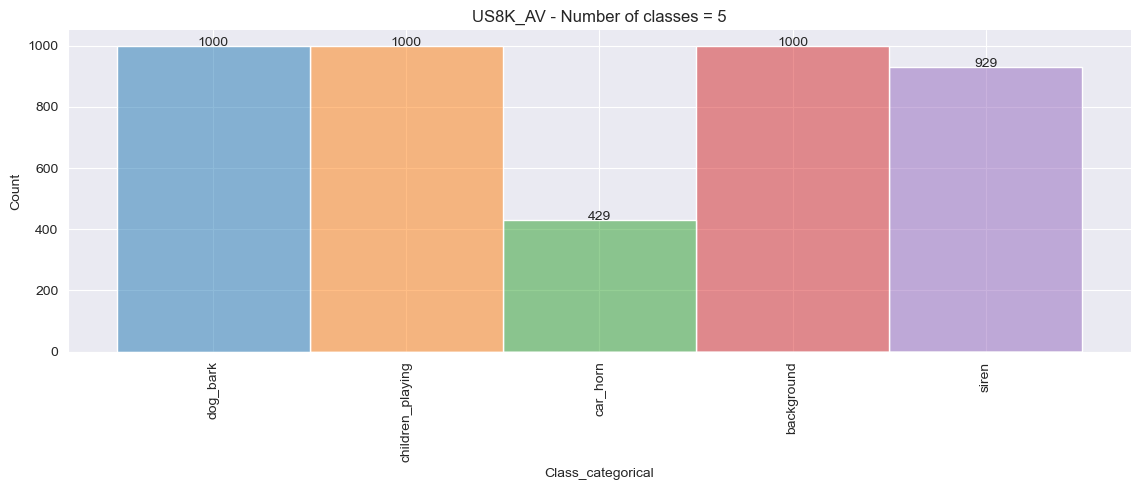

In [9]:
# Analysis of the class balancing

sns.set_style("darkgrid")
gTitle = f'{nom_dataset} - Number of classes = ' + str(len(pd.Series(DB['Class_categorical']).unique()))
g = sns.displot(DB,x='Class_categorical', hue='Class_categorical',height = 5, aspect = 2).set(title=gTitle)
g.set_xticklabels(rotation=90)
g.set_titles('Number of classes')

# Retrieve the axes object from the plot
axes = g.ax

# Iterate over each bar in the plot
for p in axes.patches:
    # Get the coordinates of the bar
    width = p.get_width()
    height = p.get_height()
    cord_x, cord_y = p.get_xy()
    if height > 0:
        axes.annotate(f'{height}', (cord_x + width/2, cord_y + height), ha='center')
        
g._legend.remove()

plt.tight_layout()

## Pre-processing the data (Features extraction)

### Exploratory code that lead to a class for extracting the features

Hand crafting the features into the dataframe

In [10]:
os.chdir(path)

In [11]:
pwd

'C:\\Andre_Florentino\\03_particular\\04_mestrado-FEI\\97_master\\_dataset\\US8K_AV'

In [12]:
# Group by the class and get one random sample of each class
k = DB.groupby('Class_categorical')['Class_OHEV'].apply(lambda s: s.sample(1))
print(k)

# Convert the pandas series into a dataframe
temp_k_df = k.reset_index()

# Delete the index from the grouppby result
del temp_k_df['level_1']

# Set the "Class" as the dataframe index
temp_k_df.set_index("Class_categorical", inplace=True)

# Convert the dataframe to a dictionary (Class: Class_encoder)
encoder_dict = temp_k_df["Class_OHEV"].to_dict()
encoder_dict

Class_categorical      
background         4239    [1, 0, 0, 0, 0]
car_horn           1917    [0, 1, 0, 0, 0]
children_playing   4347    [0, 0, 1, 0, 0]
dog_bark           2865    [0, 0, 0, 1, 0]
siren              1337    [0, 0, 0, 0, 1]
Name: Class_OHEV, dtype: object


{'background': '[1, 0, 0, 0, 0]',
 'car_horn': '[0, 1, 0, 0, 0]',
 'children_playing': '[0, 0, 1, 0, 0]',
 'dog_bark': '[0, 0, 0, 1, 0]',
 'siren': '[0, 0, 0, 0, 1]'}

In [13]:
type(DB['Class_OHEV'][0][0])

str

In [14]:
encoder_dict[dog_set]

'[0, 0, 0, 1, 0]'

In [15]:
# Read the pkl file with the augmented features extracted

opc = 0
while str(opc) not in '123':
    print()
    print("1-) Features original")
    print("2-) Features augmented")
    print("3-) Features augmented and windowed (US8K is only windowed)")

    opc = input("\nSelect the dataset: ")
    if opc.isdigit():
        opc = int(opc)
    else:
        opc = 0

if opc == 1:
    DB_from_pkl      = pd.read_pickle(os.path.join(path_models, pkl_features))
    model_surname    = '_original'
    pkl_feature_file = pkl_features_CNN_2D 
    check_agg        = 1

elif opc == 2:
    DB_from_pkl      = pd.read_pickle(os.path.join(path_models, pkl_aug_features))
    model_surname    = '_augmented'
    pkl_feature_file = pkl_aug_features_CNN_2D
    check_agg        =  aug_factor

elif (opcD == 3 or opcD == 4) and opc == 3:
    DB_from_pkl      = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))
    model_surname    = '_windowed'
    pkl_feature_file = pkl_aug_wind_features_CNN_2D
    check_agg        =  windowingNo * 1

elif opc == 3:
    DB_from_pkl      = pd.read_pickle(os.path.join(path_models, pkl_aug_wind_features))
    model_surname    = '_windowed'
    pkl_feature_file = pkl_aug_wind_features_CNN_2D
    check_agg        =  windowingNo * aug_factor
    
else:
    pass


1-) Features original
2-) Features augmented
3-) Features augmented and windowed (US8K is only windowed)

Select the dataset: 3


In [16]:
check_agg

7

In [17]:
DB_from_pkl.dtypes

Audio                  object
Class_categorical      object
Class_OHEV             object
Fold                   object
RMSE                  float64
                       ...   
TONNETZ_6             float64
TONNETZ_std_6         float64
TONNETZ_median_6      float64
TONNETZ_skew_6        float64
TONNETZ_kurtosis_6    float64
Length: 379, dtype: object

In [18]:
total_duration = 0
for audio in DB_from_pkl['Audio']:
    total_duration = total_duration + librosa.get_duration(y=audio)
print('Total duration of the dataset: ' , "{:0.4f} h".format(total_duration / 3600))

Total duration of the dataset:  8.4608 h


In [19]:
DB_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold,...,TONNETZ_std_6,TONNETZ_median_6,TONNETZ_skew_6,TONNETZ_kurtosis_6
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0]",5,...,0.025644,-0.046785,0.461191,-0.338882
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0]",5,...,0.026433,-0.030688,0.414979,-0.840459
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0]",5,...,0.023640,-0.045384,0.629947,0.096665
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0]",5,...,0.024617,-0.025407,0.554764,-0.364067
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0]",5,...,0.024934,-0.036388,0.770805,0.232676
...,...,...,...,...,...,...,...,...,...
30501,"[-0.024376377, -0.010054192, 0.0009410139, 0.005863713, -0.0005189497, -0.0021953415, 0.0013682423, -0.0043018945, -...",car_horn,"[0, 1, 0, 0, 0]",7,...,0.033488,-0.069738,0.175013,-0.974133
30502,"[0.0066777063, 0.008175363, 0.006157635, 0.0026387093, 0.00059039844, 0.0030925209, 0.0033645788, 0.0056151543, 0.00...",car_horn,"[0, 1, 0, 0, 0]",7,...,0.021007,-0.018432,-0.690702,-0.099409
30503,"[-0.0020232266, 0.001032982, 0.0023606261, 0.0017964527, 0.0009908059, -0.0011728329, -0.003362489, -0.0054453667, -...",car_horn,"[0, 1, 0, 0, 0]",7,...,0.021124,-0.016391,-0.028383,-1.071243
30504,"[-0.0015619812, 0.0005301243, 0.0032789772, 0.002725502, 0.0023546133, -0.0019822496, -0.002666029, -0.004454969, -0...",car_horn,"[0, 1, 0, 0, 0]",7,...,0.027106,-0.017513,-0.121982,-0.606880


In [20]:
for col in DB_from_pkl.columns:
    print(col)

Audio
Class_categorical
Class_OHEV
Fold
RMSE
ZCR
CENTROIDS
BANDWIDTH
ROLLOFF
MEL_1
MEL_2
MEL_3
MEL_4
MEL_5
MEL_6
MEL_7
MEL_8
MEL_9
MEL_10
MEL_11
MEL_12
MEL_13
MEL_14
MEL_15
MEL_16
MEL_17
MEL_18
MEL_19
MEL_20
MEL_21
MEL_22
MEL_23
MEL_24
MEL_25
MEL_26
MEL_27
MEL_28
MEL_29
MEL_30
MEL_31
MEL_32
MEL_33
MEL_34
MEL_35
MEL_36
MEL_37
MEL_38
MEL_39
MEL_40
MEL_41
MEL_42
MEL_43
MEL_44
MEL_45
MEL_46
MEL_47
MEL_48
MEL_49
MEL_50
MEL_51
MEL_52
MEL_53
MEL_54
MEL_55
MEL_56
MEL_57
MEL_58
MEL_59
MEL_60
MEL_61
MEL_62
MEL_63
MEL_64
MEL_65
MEL_66
MEL_67
MEL_68
MEL_69
MEL_70
MEL_71
MEL_72
MEL_73
MEL_74
MEL_75
MEL_76
MEL_77
MEL_78
MEL_79
MEL_80
MEL_81
MEL_82
MEL_83
MEL_84
MEL_85
MEL_86
MEL_87
MEL_88
MEL_89
MEL_90
MEL_91
MEL_92
MEL_93
MEL_94
MEL_95
MEL_96
MEL_97
MEL_98
MEL_99
MEL_100
MEL_101
MEL_102
MEL_103
MEL_104
MEL_105
MEL_106
MEL_107
MEL_108
MEL_109
MEL_110
MEL_111
MEL_112
MEL_113
MEL_114
MEL_115
MEL_116
MEL_117
MEL_118
MEL_119
MEL_120
MEL_121
MEL_122
MEL_123
MEL_124
MEL_125
MEL_126
MEL_127
MEL_128
MFCC_1


In [21]:
DB_from_pkl = DB_from_pkl[['Audio', 'Class_categorical', 'Class_OHEV', 'Fold']]
DB_from_pkl

,Audio,Class_categorical,Class_OHEV,Fold
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0]",5
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0]",5
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0]",5
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0]",5
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0]",5
...,...,...,...,...
30501,"[-0.024376377, -0.010054192, 0.0009410139, 0.005863713, -0.0005189497, -0.0021953415, 0.0013682423, -0.0043018945, -...",car_horn,"[0, 1, 0, 0, 0]",7
30502,"[0.0066777063, 0.008175363, 0.006157635, 0.0026387093, 0.00059039844, 0.0030925209, 0.0033645788, 0.0056151543, 0.00...",car_horn,"[0, 1, 0, 0, 0]",7
30503,"[-0.0020232266, 0.001032982, 0.0023606261, 0.0017964527, 0.0009908059, -0.0011728329, -0.003362489, -0.0054453667, -...",car_horn,"[0, 1, 0, 0, 0]",7
30504,"[-0.0015619812, 0.0005301243, 0.0032789772, 0.002725502, 0.0023546133, -0.0019822496, -0.002666029, -0.004454969, -0...",car_horn,"[0, 1, 0, 0, 0]",7


In [22]:
dog = DB_from_pkl[DB_from_pkl['Class_categorical'] == dog_set]
dog

,Audio,Class_categorical,Class_OHEV,Fold
0,"[-0.0034710653, -0.0050192624, -0.004654482, -0.0049833283, -0.0038681468, -0.0023575649, -0.00025486574, 0.00135406...",dog_bark,"[0, 0, 0, 1, 0]",5
1,"[-0.015428771, -0.0064468235, -0.002025701, -0.009768408, -0.020482529, -0.03246226, -0.046539657, -0.050950672, -0....",dog_bark,"[0, 0, 0, 1, 0]",5
2,"[-0.17165461, -0.1961453, -0.2095497, -0.116395764, 0.02499168, 0.15181583, 0.2456393, 0.24304995, 0.1697193, 0.0706...",dog_bark,"[0, 0, 0, 1, 0]",5
3,"[-0.004147315, -0.014180049, -0.016550057, -0.017083425, -0.010863152, -0.0018686495, 0.006234308, 0.00725661, 0.005...",dog_bark,"[0, 0, 0, 1, 0]",5
4,"[-0.047271818, -0.08598116, -0.08329079, -0.15244874, -0.21367016, -0.26584676, -0.19677721, -0.17195633, -0.0841544...",dog_bark,"[0, 0, 0, 1, 0]",5
...,...,...,...,...
30340,"[-0.20048752, -0.20449436, -0.2035462, -0.2061026, -0.1954153, -0.17888269, -0.16769154, -0.15045324, -0.11965492, -...",dog_bark,"[0, 0, 0, 1, 0]",5
30341,"[-0.054594755, -0.04762911, -0.037363447, -0.024450395, -0.01017545, 0.005096162, 0.01962161, 0.032091763, 0.0401442...",dog_bark,"[0, 0, 0, 1, 0]",5
30342,"[0.16961348, 0.13149211, 0.105887204, 0.11606137, 0.09814237, -0.0022641122, -0.089160204, -0.10097186, -0.09662075,...",dog_bark,"[0, 0, 0, 1, 0]",5
30343,"[-0.049842283, -0.061434712, -0.0765, -0.12497177, -0.23680596, -0.34618056, -0.34681338, -0.28121978, -0.24338673, ...",dog_bark,"[0, 0, 0, 1, 0]",5


In [23]:
random_idx = random.choice(dog.index.tolist())
random_sample = dog['Audio'][random_idx]
print(f'Dataframe index....: {random_idx}')
print(f'Sample file name...: {random_sample}')

Dataframe index....: 5363
Sample file name...: [ 0.0820543   0.03325134 -0.0400896  ...  0.00753915  0.02401776
  0.02562087]


In [24]:
ipd.Audio(random_sample, rate = SR)

In [25]:
X      = DB_from_pkl['Audio'].values
y_cat  = DB_from_pkl['Class_categorical'].values
y_OHEV = DB_from_pkl['Class_OHEV'].values
folds  = DB_from_pkl['Fold'].values

In [26]:
type(DB_from_pkl['Class_OHEV'][random_idx])

numpy.ndarray

In [27]:
librosa.get_duration(y = dog['Audio'][random_idx])

0.9984580498866213

In [28]:
pkl_features_CNN_2D

'US8K_AV_features_CNN_2D_original.pkl'

In [29]:
# Method to extract the Log-Mel + Deltas as input for the CNN 2D
        
def LogMel_extractor(audio_clips:list):
    
    log_specgrams = []
    framesLst     = []

    for signal in tqdm(audio_clips):
        melspec = librosa.feature.melspectrogram(y          = signal, 
                                                 n_mels     = BANDS,
                                                 hop_length = HOP_LENGTH, 
                                                 n_fft      = N_FTT, 
                                                 sr         = SR) 

        #logspec = librosa.core.amplitude_to_db(melspec)
        logspec = librosa.power_to_db(melspec)
        frames = logspec.shape[1]
        framesLst.append(frames)

        # Flattens the array (bands , frames) to (bands * frames , 1) E.g.: (60 , 216) --> (12.960 , 1)
        logspec = logspec.flatten()[:, np.newaxis]

        # Appends to array
        log_specgrams.append(logspec)

    # Reshape to audio, bands, frames and channels E.g.: (Depends on the model Ori or Aug, 60, 44, 1)
    log_specgrams = np.asarray(log_specgrams,dtype='float32').reshape(len(log_specgrams),BANDS,frames,1)

    # Initiate zeros for the log mel spectrogram delta
    features = np.concatenate((log_specgrams,
                               np.zeros(np.shape(log_specgrams)),
                               np.zeros(np.shape(log_specgrams))), axis=3)

    # Add the delta for the log mel spectrogram as channels
    for i in tqdm(range(len(features))):
        features[i, :, :, 1] = librosa.feature.delta(features[i, :, :, 0], order = 1)
        features[i, :, :, 2] = librosa.feature.delta(features[i, :, :, 0], order = 2)

    # Vertically stack up the deltas to created an aggregated structures of features
    mel, delta1, delta2 = np.split(features, 3, axis=3)
    aggregated          = np.concatenate((mel, delta1, delta2), axis=1)
        
    if len(set(framesLst)) == 1:
        duration = "{:.2f}".format((framesLst[0]*HOP_LENGTH)/SR)
        print(f"Mel spectrogram created by a {duration} seconds audio. Number of frames: {framesLst[0]}")
        
    return np.array(aggregated), np.array(features)

In [30]:
X, X_channel = LogMel_extractor(X)

100%|███████████████████████████████████████████████████████████████████████████| 30506/30506 [00:42<00:00, 720.73it/s]


Mel spectrogram created by a 1.02 seconds audio. Number of frames: 44


In [31]:
X.shape

(30506, 180, 44, 1)

In [32]:
len(X)

30506

In [33]:
len(X[0])

180

In [34]:
len(X[0][0])

44

In [35]:
X[0].shape

(180, 44, 1)

In [36]:
index = random.randint(1,len(X))
random_sample_agg = X[index]
print(index)
print(random_sample_agg.shape)

8874
(180, 44, 1)


In [37]:
random_sample = X_channel[index]
print(index)
print(random_sample.shape)

8874
(60, 44, 3)


In [38]:
X[index]

array([[[-7.42684174],
        [-3.12630773],
        [-1.79360759],
        ...,
        [-7.01967192],
        [-7.38993549],
        [-5.12584734]],

       [[-6.55288315],
        [ 2.9471879 ],
        [ 5.84162283],
        ...,
        [ 2.40795326],
        [ 7.46837568],
        [ 5.42128611]],

       [[-1.73825479],
        [ 1.926229  ],
        [ 5.51142788],
        ...,
        [ 1.78361869],
        [ 7.24461985],
        [ 4.51377726]],

       ...,

       [[ 0.72009276],
        [ 0.72009276],
        [ 0.72009276],
        ...,
        [-0.43229607],
        [-0.43229607],
        [-0.43229607]],

       [[ 0.42575476],
        [ 0.42575476],
        [ 0.42575476],
        ...,
        [-0.12300348],
        [-0.12300348],
        [-0.12300348]],

       [[ 0.31857704],
        [ 0.31857704],
        [ 0.31857704],
        ...,
        [-0.07657863],
        [-0.07657863],
        [-0.07657863]]])

In [39]:
DB_from_pkl['Audio'][index]

array([0.00965412, 0.00764519, 0.00486507, ..., 0.00212557, 0.00248345,
       0.00123496], dtype=float32)

In [40]:
DB_from_pkl['Class_categorical'][index]

'siren'

In [41]:
ipd.Audio(DB_from_pkl['Audio'][index], rate = SR)

In [42]:
X_mel, X_mel_delta, X_mel_delta2 = np.split(random_sample, 3, axis=2)

print(X_mel.shape)
print(X_mel_delta.shape)
print(X_mel_delta2.shape)


X_mel = np.squeeze(X_mel) 
X_mel_delta = np.squeeze(X_mel_delta)
X_mel_delta2 = np.squeeze(X_mel_delta2)


print(X_mel.shape)
print(X_mel_delta.shape)
print(X_mel_delta2.shape)

(60, 44, 1)
(60, 44, 1)
(60, 44, 1)
(60, 44)
(60, 44)
(60, 44)


In [43]:
X_mel[0]

array([ -7.42684174,  -3.12630773,  -1.79360759,  -7.31112862,
        -7.01274443,  -2.3122983 ,  -1.79821599,  -0.07752411,
        -5.33978415,  -9.01025391,  -4.7882514 ,  -2.41068673,
        -2.14832973,  -1.83315563,  -2.79656053,  -3.553514  ,
        -3.46993971,  -4.04118681,  -1.4190675 ,   0.72301221,
        -1.90133309,  -5.80500174,  -4.98896694,  -9.21209908,
       -13.40877438,  -5.70931673,  -2.39504838,  -2.02589726,
        -6.06970406,  -5.2965951 ,  -4.78864765,  -9.27056694,
        -2.74844146,   0.91211009,  -2.82037139,  -1.53283453,
        -1.39830065,  -3.28425455,  -2.76644468,  -4.0716238 ,
        -3.2328856 ,  -7.01967192,  -7.38993549,  -5.12584734])

In [44]:
X_mel_delta[0]

array([ 0.37473658,  0.37473658,  0.37473658,  0.37473658,  0.37473658,
       -0.24154295, -0.19158761,  0.15562945,  0.07082821, -0.05414272,
        0.06203672,  0.17866382,  0.47350851,  0.34828864,  0.07036095,
        0.16055235,  0.18206339, -0.04329629, -0.12704461, -0.52002196,
       -1.14893147, -1.09332495, -0.82704817, -0.34508702,  0.05590748,
        0.40295908,  0.51515582,  0.37962161,  0.39832808,  0.20362075,
        0.16302139,  0.43629776,  0.73493541,  0.56039897,  0.43838477,
        0.22951841, -0.30887575, -0.65683989, -0.65325513, -0.67140386,
       -0.67140386, -0.67140386, -0.67140386, -0.67140386])

In [45]:
X_mel_delta2[0]

array([-0.10239094, -0.10239094, -0.10239094, -0.10239094, -0.10239094,
       -0.29137652, -0.26651558, -0.30593268,  0.05283263,  0.49478104,
        0.44977799,  0.2040247 , -0.34378405, -0.55153209, -0.05739674,
        0.32980272,  0.24041595, -0.13024413, -0.33710796, -0.64046199,
       -0.84348969, -0.16376875,  0.72695138,  1.13108805,  0.65564144,
        0.18290018, -0.0868109 , -0.80612678, -0.54960002,  0.45577788,
        0.56305543,  0.40420501,  0.00221777, -0.26129351, -0.43136938,
       -0.62951141, -0.07584999, -0.06940065, -0.27776585,  0.03872675,
        0.03872675,  0.03872675,  0.03872675,  0.03872675])

In [46]:
t = X[index]
t.shape

(180, 44, 1)

In [47]:
t_s = np.squeeze(t) 
t_s.shape

(180, 44)

In [48]:
# Split based on the number of mel bands

array1 = t_s[:60, :]
array2 = t_s[60:120, :]
array3 = t_s[120:, :]

In [49]:
array1[0]

array([ -7.42684174,  -3.12630773,  -1.79360759,  -7.31112862,
        -7.01274443,  -2.3122983 ,  -1.79821599,  -0.07752411,
        -5.33978415,  -9.01025391,  -4.7882514 ,  -2.41068673,
        -2.14832973,  -1.83315563,  -2.79656053,  -3.553514  ,
        -3.46993971,  -4.04118681,  -1.4190675 ,   0.72301221,
        -1.90133309,  -5.80500174,  -4.98896694,  -9.21209908,
       -13.40877438,  -5.70931673,  -2.39504838,  -2.02589726,
        -6.06970406,  -5.2965951 ,  -4.78864765,  -9.27056694,
        -2.74844146,   0.91211009,  -2.82037139,  -1.53283453,
        -1.39830065,  -3.28425455,  -2.76644468,  -4.0716238 ,
        -3.2328856 ,  -7.01967192,  -7.38993549,  -5.12584734])

In [50]:
array2[0]

array([ 0.37473658,  0.37473658,  0.37473658,  0.37473658,  0.37473658,
       -0.24154295, -0.19158761,  0.15562945,  0.07082821, -0.05414272,
        0.06203672,  0.17866382,  0.47350851,  0.34828864,  0.07036095,
        0.16055235,  0.18206339, -0.04329629, -0.12704461, -0.52002196,
       -1.14893147, -1.09332495, -0.82704817, -0.34508702,  0.05590748,
        0.40295908,  0.51515582,  0.37962161,  0.39832808,  0.20362075,
        0.16302139,  0.43629776,  0.73493541,  0.56039897,  0.43838477,
        0.22951841, -0.30887575, -0.65683989, -0.65325513, -0.67140386,
       -0.67140386, -0.67140386, -0.67140386, -0.67140386])

In [51]:
array3[0]

array([-0.10239094, -0.10239094, -0.10239094, -0.10239094, -0.10239094,
       -0.29137652, -0.26651558, -0.30593268,  0.05283263,  0.49478104,
        0.44977799,  0.2040247 , -0.34378405, -0.55153209, -0.05739674,
        0.32980272,  0.24041595, -0.13024413, -0.33710796, -0.64046199,
       -0.84348969, -0.16376875,  0.72695138,  1.13108805,  0.65564144,
        0.18290018, -0.0868109 , -0.80612678, -0.54960002,  0.45577788,
        0.56305543,  0.40420501,  0.00221777, -0.26129351, -0.43136938,
       -0.62951141, -0.07584999, -0.06940065, -0.27776585,  0.03872675,
        0.03872675,  0.03872675,  0.03872675,  0.03872675])

In [52]:
(X_mel[0] == array1[0]).all()

True

In [53]:
(X_mel_delta[0] == array2[0]).all()

True

In [54]:
(X_mel_delta2[0] == array3[0]).all()

True

In [55]:
array1.shape

(60, 44)

In [56]:
X_mel.shape

(60, 44)

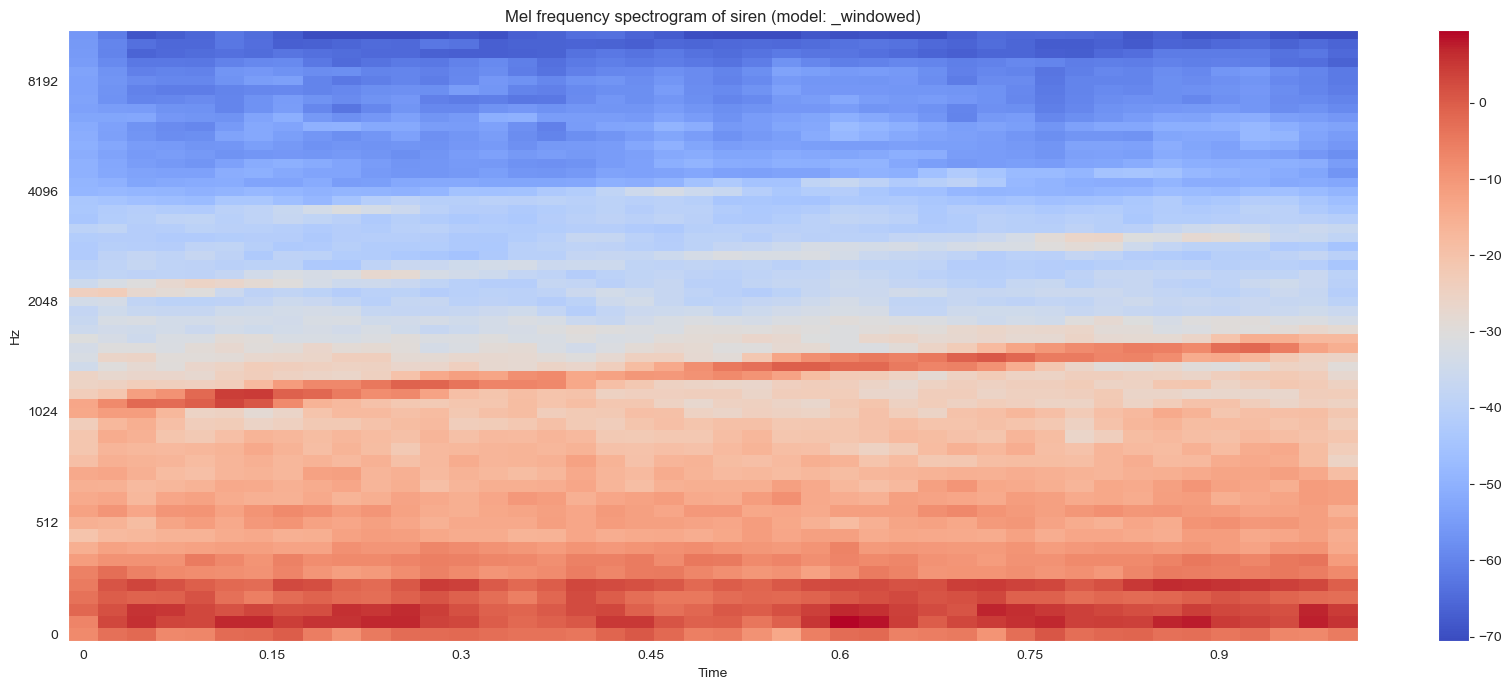

In [57]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(17,7))

librosa.display.specshow(X_mel, sr=SR, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title(f"Mel frequency spectrogram of {DB_from_pkl['Class_categorical'][index]} (model: {model_surname})" )

plt.savefig(os.path.join(path_pic, picture_name))

plt.tight_layout()

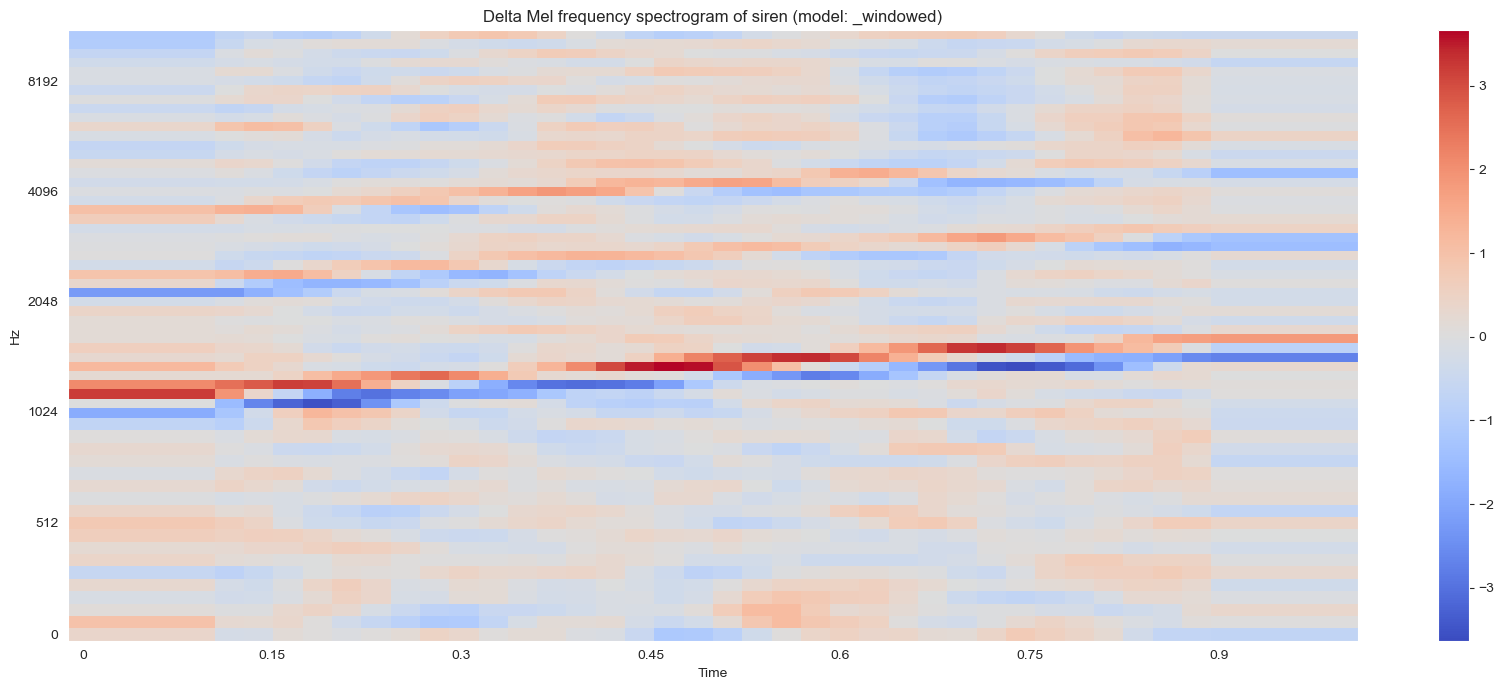

In [58]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(17,7))

librosa.display.specshow(X_mel_delta, sr=SR, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title(f"Delta Mel frequency spectrogram of {DB_from_pkl['Class_categorical'][index]} (model: {model_surname})" )

plt.savefig(os.path.join(path_pic, picture_name))

plt.tight_layout()

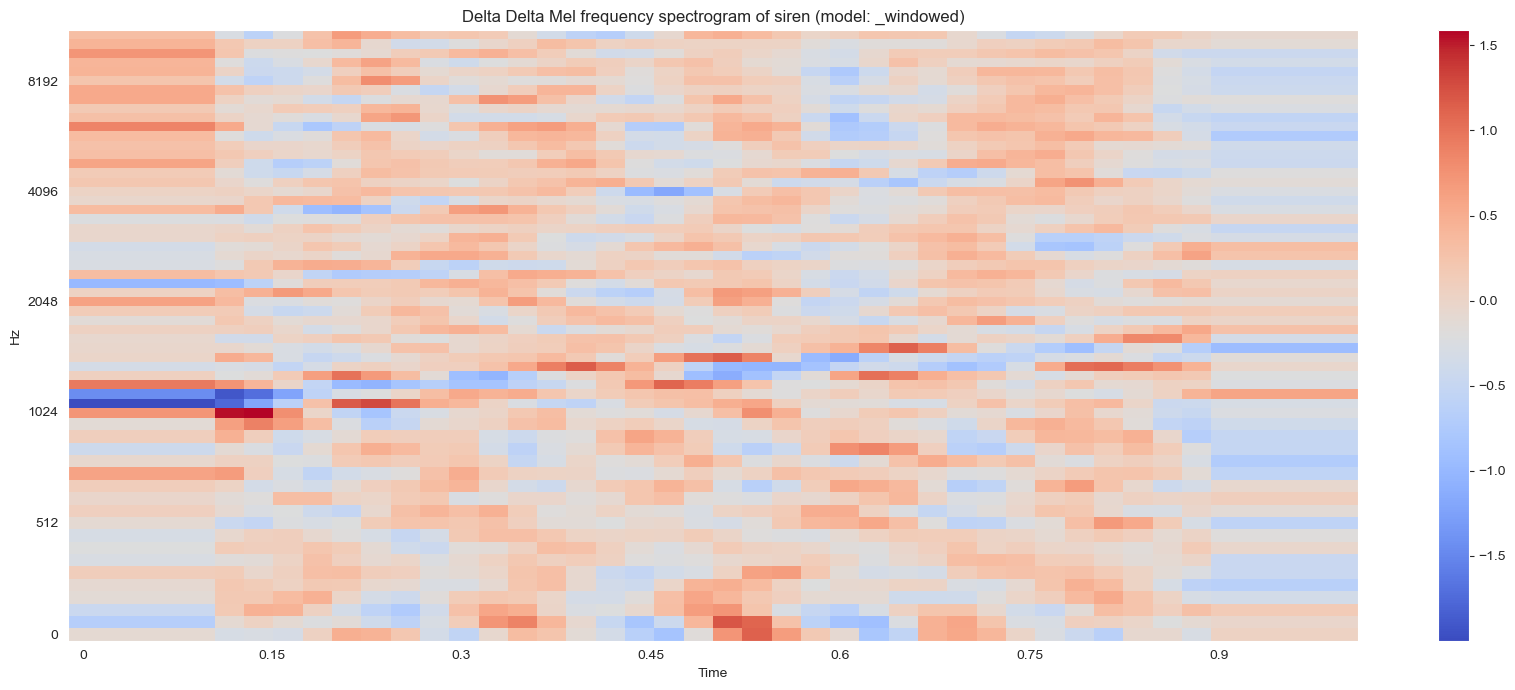

In [59]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(17,7))

librosa.display.specshow(X_mel_delta2, sr=SR, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title(f"Delta Delta Mel frequency spectrogram of {DB_from_pkl['Class_categorical'][index]} (model: {model_surname})" )

plt.savefig(os.path.join(path_pic, picture_name))

plt.tight_layout()

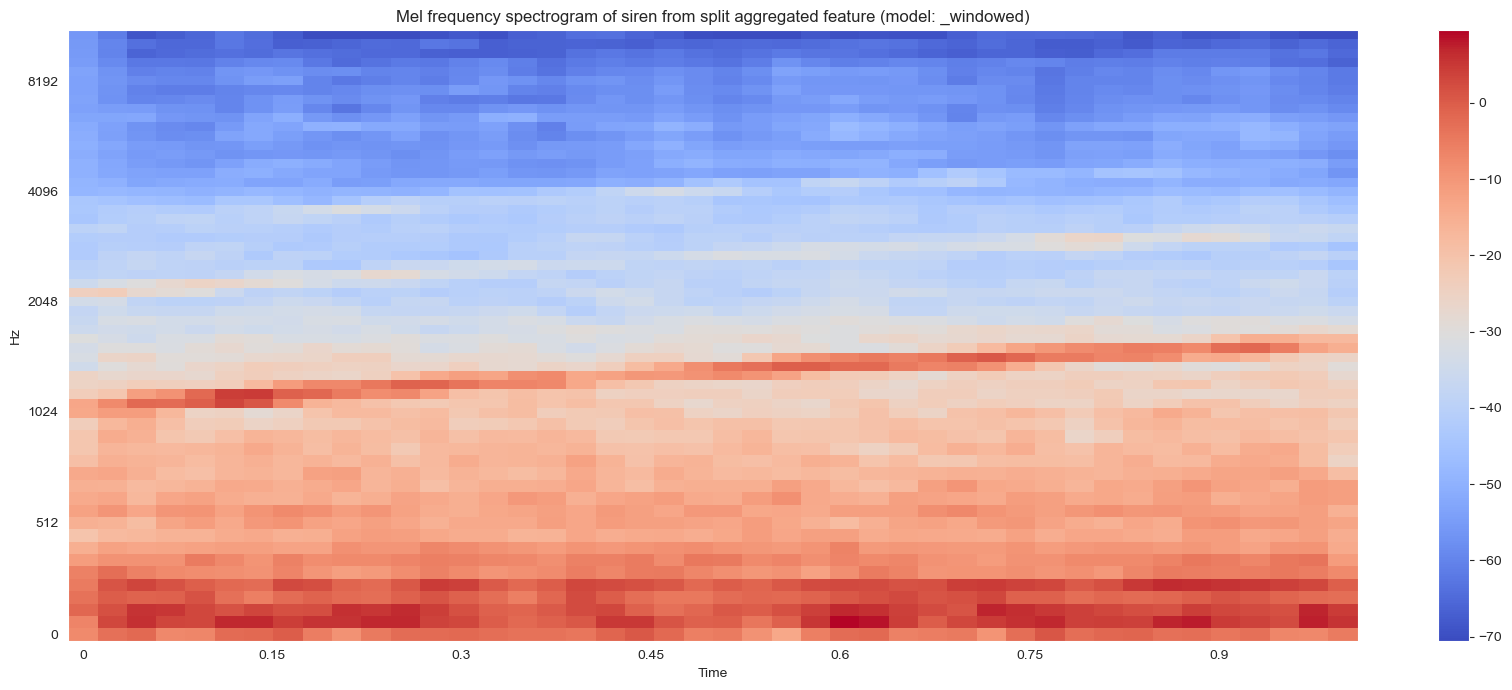

In [60]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(17,7))

librosa.display.specshow(array1, sr=SR, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title(f"Mel frequency spectrogram of {DB_from_pkl['Class_categorical'][index]} from split aggregated feature (model: {model_surname})" )

plt.savefig(os.path.join(path_pic, picture_name))

plt.tight_layout()

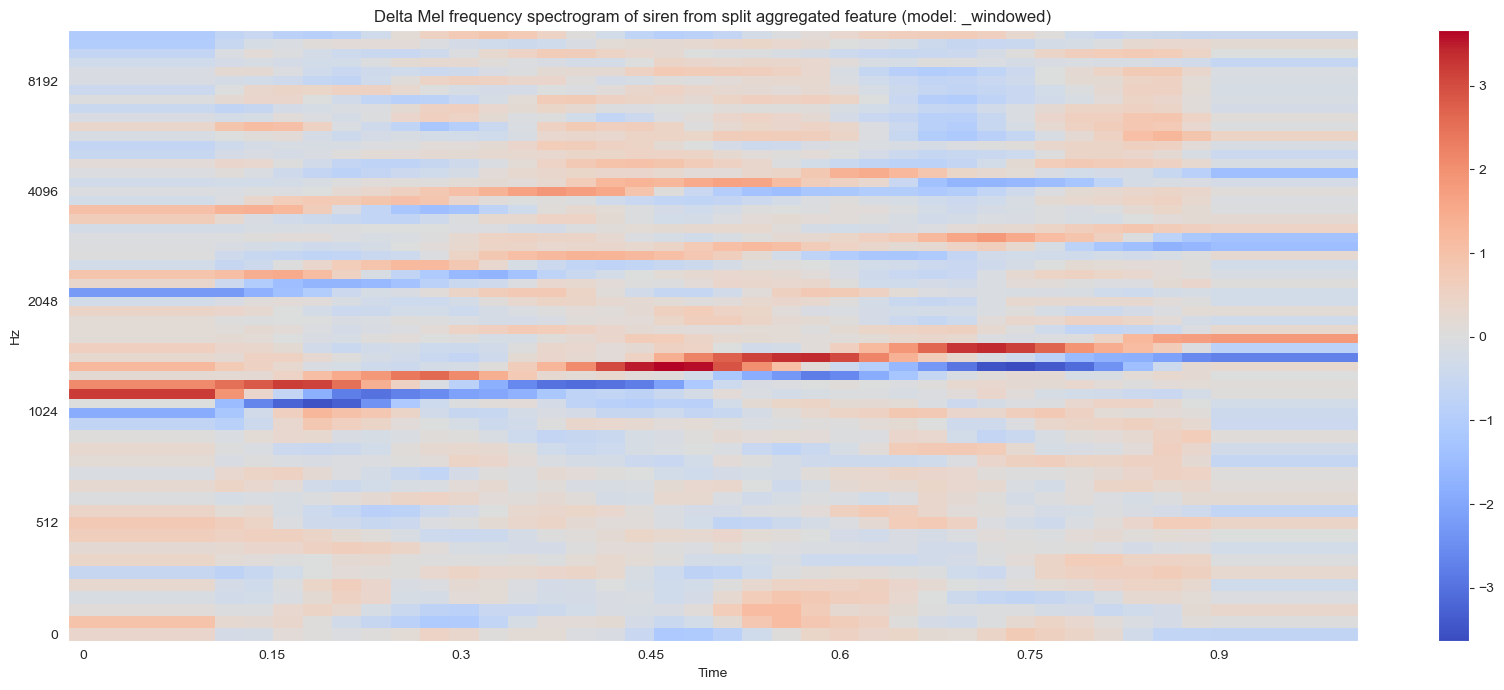

In [61]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(17,7))

librosa.display.specshow(array2, sr=SR, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title(f"Delta Mel frequency spectrogram of {DB_from_pkl['Class_categorical'][index]} from split aggregated feature (model: {model_surname})" )

plt.savefig(os.path.join(path_pic, picture_name))

plt.tight_layout()

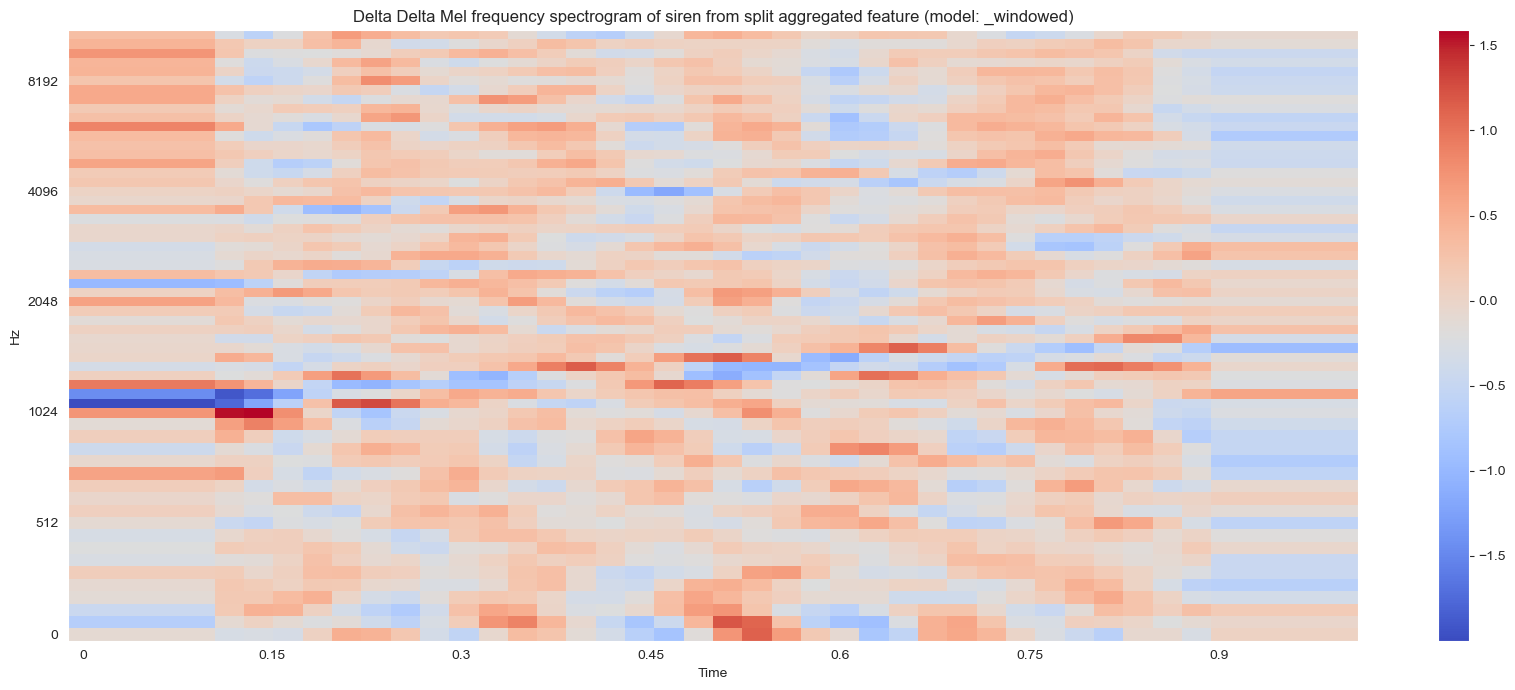

In [62]:
picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'

plt.figure(figsize=(17,7))

librosa.display.specshow(array3, sr=SR, x_axis='time', y_axis='mel')
plt.colorbar()
plt.title(f"Delta Delta Mel frequency spectrogram of {DB_from_pkl['Class_categorical'][index]} from split aggregated feature (model: {model_surname})" )

plt.savefig(os.path.join(path_pic, picture_name))

plt.tight_layout()

In [63]:
# Convert the array to DataFrame
array_list = [X[i] for i in range(X.shape[0])]

# Insert the label colum in the DataFrame
DB_from_pkl.insert(loc = 4, column = 'features', value = array_list)

# Drops the audio data
DB_features = DB_from_pkl.copy()
DB_features = DB_features.drop(columns='Audio')

In [64]:
DB_features

,Class_categorical,Class_OHEV,Fold,features
0,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-44.0467643737793], [-39.25644302368164], [-38.62413787841797], [-36.58848571777344], [-32.5598030090332], [-31.4..."
1,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-29.934663772583008], [-34.787696838378906], [-40.06871795654297], [-41.22150802612305], [-41.03109359741211], [-..."
2,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-23.2158260345459], [-28.396337509155273], [-32.66521072387695], [-31.442462921142578], [-35.61741256713867], [-3..."
3,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-37.06025695800781], [-39.86629104614258], [-41.0966682434082], [-38.97296142578125], [-41.87018966674805], [-39...."
4,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-28.527423858642578], [-29.930322647094727], [-35.48342514038086], [-38.032806396484375], [-38.82895278930664], [..."
...,...,...,...,...
30501,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-16.7570743560791], [-12.688139915466309], [-16.03248405456543], [-15.612970352172852], [-12.660606384277344], [-..."
30502,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-14.313464164733887], [-12.228155136108398], [-15.787863731384277], [-16.082149505615234], [-12.465015411376953],..."
30503,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-24.34674835205078], [-17.664506912231445], [-11.443778038024902], [-11.371871948242188], [-12.617921829223633], ..."
30504,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-20.291765213012695], [-13.778326034545898], [-9.759299278259277], [-8.09199333190918], [-8.728732109069824], [-1..."


In [65]:
pkl_feature_file

'US8K_AV_features_CNN_2D_windowed.pkl'

In [66]:
# Save the features to a pickle file

DB_features.to_pickle(os.path.join(path_models, pkl_feature_file))

In [67]:
# Read the pkl file with the features extracted for the CNN classifier

DB_retrieved_pkl = pd.read_pickle(os.path.join(path_models, pkl_feature_file))

In [68]:
DB_retrieved_pkl

,Class_categorical,Class_OHEV,Fold,features
0,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-44.0467643737793], [-39.25644302368164], [-38.62413787841797], [-36.58848571777344], [-32.5598030090332], [-31.4..."
1,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-29.934663772583008], [-34.787696838378906], [-40.06871795654297], [-41.22150802612305], [-41.03109359741211], [-..."
2,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-23.2158260345459], [-28.396337509155273], [-32.66521072387695], [-31.442462921142578], [-35.61741256713867], [-3..."
3,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-37.06025695800781], [-39.86629104614258], [-41.0966682434082], [-38.97296142578125], [-41.87018966674805], [-39...."
4,dog_bark,"[0, 0, 0, 1, 0]",5,"[[[-28.527423858642578], [-29.930322647094727], [-35.48342514038086], [-38.032806396484375], [-38.82895278930664], [..."
...,...,...,...,...
30501,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-16.7570743560791], [-12.688139915466309], [-16.03248405456543], [-15.612970352172852], [-12.660606384277344], [-..."
30502,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-14.313464164733887], [-12.228155136108398], [-15.787863731384277], [-16.082149505615234], [-12.465015411376953],..."
30503,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-24.34674835205078], [-17.664506912231445], [-11.443778038024902], [-11.371871948242188], [-12.617921829223633], ..."
30504,car_horn,"[0, 1, 0, 0, 0]",7,"[[[-20.291765213012695], [-13.778326034545898], [-9.759299278259277], [-8.09199333190918], [-8.728732109069824], [-1..."


In [69]:
# Retrieve the information from DataFrame as numpy array
X3 = DB_retrieved_pkl['features'].to_numpy()
y3 = DB_retrieved_pkl['Class_OHEV'].values

#Reshape to the correct dimension
X3_reshaped = np.stack(X3)

In [70]:
X3_reshaped.shape

(30506, 180, 44, 1)

In [71]:
(X == X3_reshaped).all()

True

In [72]:
count = 0
for arr1,arr2 in zip(y_OHEV,y3):
    if np.array_equal(arr1,arr2) == False:
        count = count + 1
if count > 0:
    print("The arrays are NOT identical")
else:
    print("The arrays are identical")

The arrays are identical


## Checking the Log mel spectogram manually created data against the aggregated method

In [73]:
# Windowing function 

def windows(data, window_size):
    start = 0
    while start < len(data):
        yield int(start), int(start + window_size)
        start += (window_size / 2)

In [74]:
# Function to augment the audio and extract the features
        
def window_audio_file(data: list, SR: int ):

    frames_no      = frames
    window_size    = 512 * (frames_no - 1)
    audio_windowed = []
       
    for (start, end) in windows(data, window_size):
        if(len(data[start:end]) == window_size):

            # Window the audio
            signal  = data[start:end]

            # Appends to array
            audio_windowed.append(signal)
    
    return np.array(audio_windowed)

In [75]:
def pre_processing(files:list, time_length:int):
    
    time_length       = time_length  
    silence_threshold = threshold
    target_samples    = int(time_length * SR)
    audio_array       = []


    for i, audio in tqdm(enumerate(files, start=0)):

        # Split the audio into non-silent intervals
        non_silent_intervals = librosa.effects.split(audio, 
                                                     top_db       = silence_threshold,
                                                     frame_length = FRAME_SIZE, 
                                                     hop_length   = HOP_LENGTH)

        # Extract non-silent segments from the original audio data
        non_silent_audio  = []
        for interval in non_silent_intervals:
            start, end = interval
            non_silent_audio.extend(audio[start:end])

        # Convert the list back to a NumPy array
        non_silent_audio_array = np.array(non_silent_audio)

        # Repeat the non-silent audio array to fit the target time length
        extended_audio = np.tile(non_silent_audio_array, target_samples // len(non_silent_audio_array) + 1)

        # Truncate the extended audio to match the desired duration
        audio_array.append(extended_audio[:target_samples])
    
    return audio_array

In [76]:
def augmentation(files:list):
    
    audio_augmented = []
    
    for rawdata in files:

        start_  = int(np.random.uniform(-4800,4800))

        # Time shifting (randomly)
        if start_ >= 0:
            audio_time_shift = np.r_[rawdata[start_:], np.random.uniform(-0.001,0.001, start_)]
        else:
            audio_time_shift = np.r_[np.random.uniform(-0.001,0.001, -start_), rawdata[:start_]]

        audio_augmented.append(rawdata)
        audio_augmented.append(audio_time_shift)

        # Time stretching
        audio_augmented.append(librosa.effects.time_stretch(rawdata, rate=0.85))
        audio_augmented.append(librosa.effects.time_stretch(rawdata, rate=1.15))

        # Pitch shifting
        audio_augmented.append(librosa.effects.pitch_shift(rawdata, sr = SR, n_steps = 4))
        audio_augmented.append(librosa.effects.pitch_shift(rawdata, sr = SR, n_steps = -4))
        
    audio_augmented = pre_processing(audio_augmented, time_length)

    return audio_augmented

In [77]:
# Gets a random index from the original dataset

index_chk = random.randint(1,len(DB))
index_chk

306

In [78]:
# Creates a probe list from the random index

probe_list = []
t = DB['Path'][index_chk]
print(t)
probe, _ = librosa.load(t, sr = SR)
probe_list.append(probe)
print(probe_list)

C:\Andre_Florentino\03_particular\04_mestrado-FEI\97_master\_dataset\US8K\fold5\111671-8-0-13.wav
[array([-0.01347276,  0.00805925,  0.05119918, ..., -0.02014197,
       -0.02007677, -0.0140177 ], dtype=float32)]


In [79]:
# Sample from original audio dataset

print(DB['Class_categorical'][index_chk])
print('Audio file duration: ' , "{:0.4f} s".format(librosa.get_duration(y=probe)))
print(len(probe))
ipd.Audio(probe, rate = SR)

siren
Audio file duration:  4.0000 s
88200


In [80]:
probe.shape

(88200,)

In [81]:
np.shape(probe_list)

(1, 88200)

In [82]:
# Audio normalization

audio_pp = pre_processing(probe_list, time_length)

1it [00:00,  1.37it/s]


In [83]:
np.shape(audio_pp)

(1, 88200)

In [84]:
# Audio augmentation

audio_aug = augmentation(probe_list)

6it [00:00, 55.70it/s]


In [85]:
np.shape(audio_aug)

(6, 88200)

In [86]:
# Sample from original audio dataset pre-processed individually

print('Audio file duration: ' , "{:0.4f} s".format(librosa.get_duration(y=audio_pp[0])))
print(len(audio_pp[0]))
ipd.Audio(audio_pp[0], rate = SR)

Audio file duration:  4.0000 s
88200


In [87]:
# Audio framing (windowing)

windowed = window_audio_file(audio_pp[0], SR)

In [88]:
windowed.shape

(7, 22016)

In [89]:
# Sample from original audio dataset pre-processed individually and windowed

print('Audio file duration: ' , "{:0.4f} s".format(librosa.get_duration(y=windowed[0])))
print(len(windowed[0]))
ipd.Audio(windowed[0], rate = SR)

Audio file duration:  0.9985 s
22016


In [90]:
windowed[0]

array([-0.01347276,  0.00805925,  0.05119918, ..., -0.01770115,
       -0.00286575,  0.01116849], dtype=float32)

In [91]:
# Equivalent sample from the augmented dataset

print(DB_from_pkl['Class_categorical'][index_chk * check_agg])
print('Audio file duration: ' , "{:0.4f} s".format(librosa.get_duration(y=DB_from_pkl['Audio'][index_chk * check_agg])))
DB_from_pkl['Audio'][index_chk * check_agg]
ipd.Audio(DB_from_pkl['Audio'][index_chk * check_agg], rate = SR)

siren
Audio file duration:  0.9985 s


In [92]:
windowed[0].shape

(22016,)

In [93]:
DB_from_pkl['Audio'][index_chk * check_agg].shape

(22016,)

In [94]:
index_chk * check_agg

2142

In [95]:
if opc == 1:
    array_check = audio_pp[0]
    
elif opc == 2:
    array_check = audio_aug[0]
    
else:
    array_check = windowed[0]

In [96]:
(array_check == DB_from_pkl['Audio'][index_chk * check_agg]).all()

True

In [97]:
# Check the audio data if uncomented in line 62 --> DB_features = DB_features.drop(columns='Audio')
# Not needed anymore, used utilized during script development to check the data consistency

# (array_check == DB_retrieved_pkl['Audio'][index_chk * check_agg]).all()

In [98]:
# Check the audio data if uncomented in line 62 --> DB_features = DB_features.drop(columns='Audio')
# Not needed anymore, used utilized during script development to check the data consistency

# (array_check == DB_features['Audio'][index_chk * check_agg]).all()

In [99]:
XS  = librosa.feature.melspectrogram(y          = array_check,
                                     sr         = SR, 
                                     n_fft      = N_FTT,
                                     hop_length = HOP_LENGTH,
                                     n_mels     = BANDS)

Xdb = librosa.power_to_db(XS)

In [100]:
XS.shape

(60, 44)

In [101]:
Xdb.shape

(60, 44)

In [102]:
Xdb_delta = librosa.feature.delta(Xdb, order = 1)
Xdb_delta.shape

(60, 44)

In [103]:
Xdb_delta2 = librosa.feature.delta(Xdb, order = 2)
Xdb_delta2.shape

(60, 44)

In [104]:
#X_mel, X_mel_delta, X_mel_delta2 = np.split(X_channel[0], 3, axis=2)
#print(X_mel.shape)  # Output: (60, 41, 1)
#print(X_mel_delta.shape)  # Output: (60, 41, 1)
#print(X_mel_delta2.shape)  # Output: (60, 41, 1)

#X_mel = np.squeeze(X_mel) 
#X_mel_delta = np.squeeze(X_mel_delta)
#X_mel_delta2 = np.squeeze(X_mel_delta2)

#print(X_mel.shape)  # Output: (60, 41, 1)
#print(X_mel_delta.shape)  # Output: (60, 41, 1)
#print(X_mel_delta2.shape)  # Output: (60, 41, 1)

In [105]:
index_chk * check_agg

2142

In [106]:
print(DB_retrieved_pkl['Class_categorical'][index_chk * check_agg])
temp = np.squeeze(X3[index_chk * check_agg]).astype('float32') 
X_mel, X_mel_delta, X_mel_delta2 = temp[:60, :], temp[60:120, :], temp[120:, :]

print(X_mel.shape)  # Output: (60, 41, 1)
print(X_mel_delta.shape)  # Output: (60, 41, 1)
print(X_mel_delta2.shape)  # Output: (60, 41, 1)

siren
(60, 44)
(60, 44)
(60, 44)


In [107]:
print((Xdb        == X_mel).all())
print((Xdb_delta  == X_mel_delta).all())
print((Xdb_delta2 == X_mel_delta2).all())

True
True
True


In [108]:
# Just a test

frames = np.linspace(1, 216, num=216)
frames

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [109]:
# Compute mel spectrogram and plot result

def mel_spectrogram_aug(audio_mel:list, title_add:str):
    
    picture_name = f'{pic_first_name}{get_next_file_number(path_pic):02d}.png'
    
    frames_x = np.linspace(0, audio_mel.shape[1], num=audio_mel.shape[1])
    mels_y   = np.linspace(0, audio_mel.shape[0], num=audio_mel.shape[0])
    
    plt.figure(figsize = (20, 8))
    
    librosa.display.specshow(audio_mel, sr=SR, x_axis='time', y_axis='mel')
    plt.colorbar(format = "%+2.0f dB")
    
    plt.title(nom_dataset + f" - Log mel frequency spectrogram for the seletec sample " + title_add, fontsize = 16)
    plt.xlabel("Time")
    
    for i, frame in enumerate(frames_x):
        plt.annotate(str(int(frame)), (i/len(frames_x), 0.0), xycoords='axes fraction', ha='center')
    
    # Plot the y space based on the number of mels --> image of 41 frames x 60 mels.
    # Works only if the y_axis = 'linear'
    #y_min = 0
    #y_max = 1
    #y_coords = np.linspace(0, y_max, num=60)
    #for y_coord, y_val in zip(y_coords, mels_y):
    #    plt.annotate(str(int(y_val)), (1, y_coord), ha='right', va='top', xycoords='axes fraction', fontsize = 6)
      
    plt.tight_layout()
    plt.savefig(os.path.join(path_pic, picture_name))
    plt.show() 

In [110]:
for i in X_mel:
    print(i)

[-17.176931 -23.14519  -43.313488 -40.44455  -41.161957 -47.093758
 -45.746883 -39.29359  -37.27657  -38.165615 -41.970634 -46.03867
 -41.17464  -38.828968 -39.95902  -43.17147  -45.103794 -44.028057
 -42.46762  -41.071526 -39.745827 -40.93892  -41.28965  -39.72345
 -42.792454 -43.72525  -43.154064 -43.4597   -45.53129  -40.63494
 -38.54155  -43.166584 -43.26265  -40.628548 -39.02682  -37.85202
 -40.15459  -41.813858 -41.565266 -38.657593 -38.99987  -42.232574
 -39.30766  -34.729237]
[-17.274765 -23.210747 -37.57653  -36.41525  -38.47095  -36.189495
 -35.762104 -37.25087  -36.99802  -37.68508  -36.93546  -36.488323
 -34.719315 -35.19815  -36.476044 -37.288975 -37.53562  -37.91365
 -38.7722   -38.68937  -38.738674 -37.916676 -38.020634 -37.86192
 -36.754498 -37.7006   -38.16076  -37.3854   -37.188896 -37.595207
 -36.942055 -38.906597 -36.53752  -37.3546   -37.5861   -37.057777
 -37.761826 -39.254128 -36.721077 -36.287052 -36.985863 -38.740368
 -37.976963 -35.814674]
[-16.807693 -22.3992

In [111]:
for i in Xdb:
    print(i)

[-17.176931 -23.14519  -43.313488 -40.44455  -41.161957 -47.093758
 -45.746883 -39.29359  -37.27657  -38.165615 -41.970634 -46.03867
 -41.17464  -38.828968 -39.95902  -43.17147  -45.103794 -44.028057
 -42.46762  -41.071526 -39.745827 -40.93892  -41.28965  -39.72345
 -42.792454 -43.72525  -43.154064 -43.4597   -45.53129  -40.63494
 -38.54155  -43.166584 -43.26265  -40.628548 -39.02682  -37.85202
 -40.15459  -41.813858 -41.565266 -38.657593 -38.99987  -42.232574
 -39.30766  -34.729237]
[-17.274765 -23.210747 -37.57653  -36.41525  -38.47095  -36.189495
 -35.762104 -37.25087  -36.99802  -37.68508  -36.93546  -36.488323
 -34.719315 -35.19815  -36.476044 -37.288975 -37.53562  -37.91365
 -38.7722   -38.68937  -38.738674 -37.916676 -38.020634 -37.86192
 -36.754498 -37.7006   -38.16076  -37.3854   -37.188896 -37.595207
 -36.942055 -38.906597 -36.53752  -37.3546   -37.5861   -37.057777
 -37.761826 -39.254128 -36.721077 -36.287052 -36.985863 -38.740368
 -37.976963 -35.814674]
[-16.807693 -22.3992

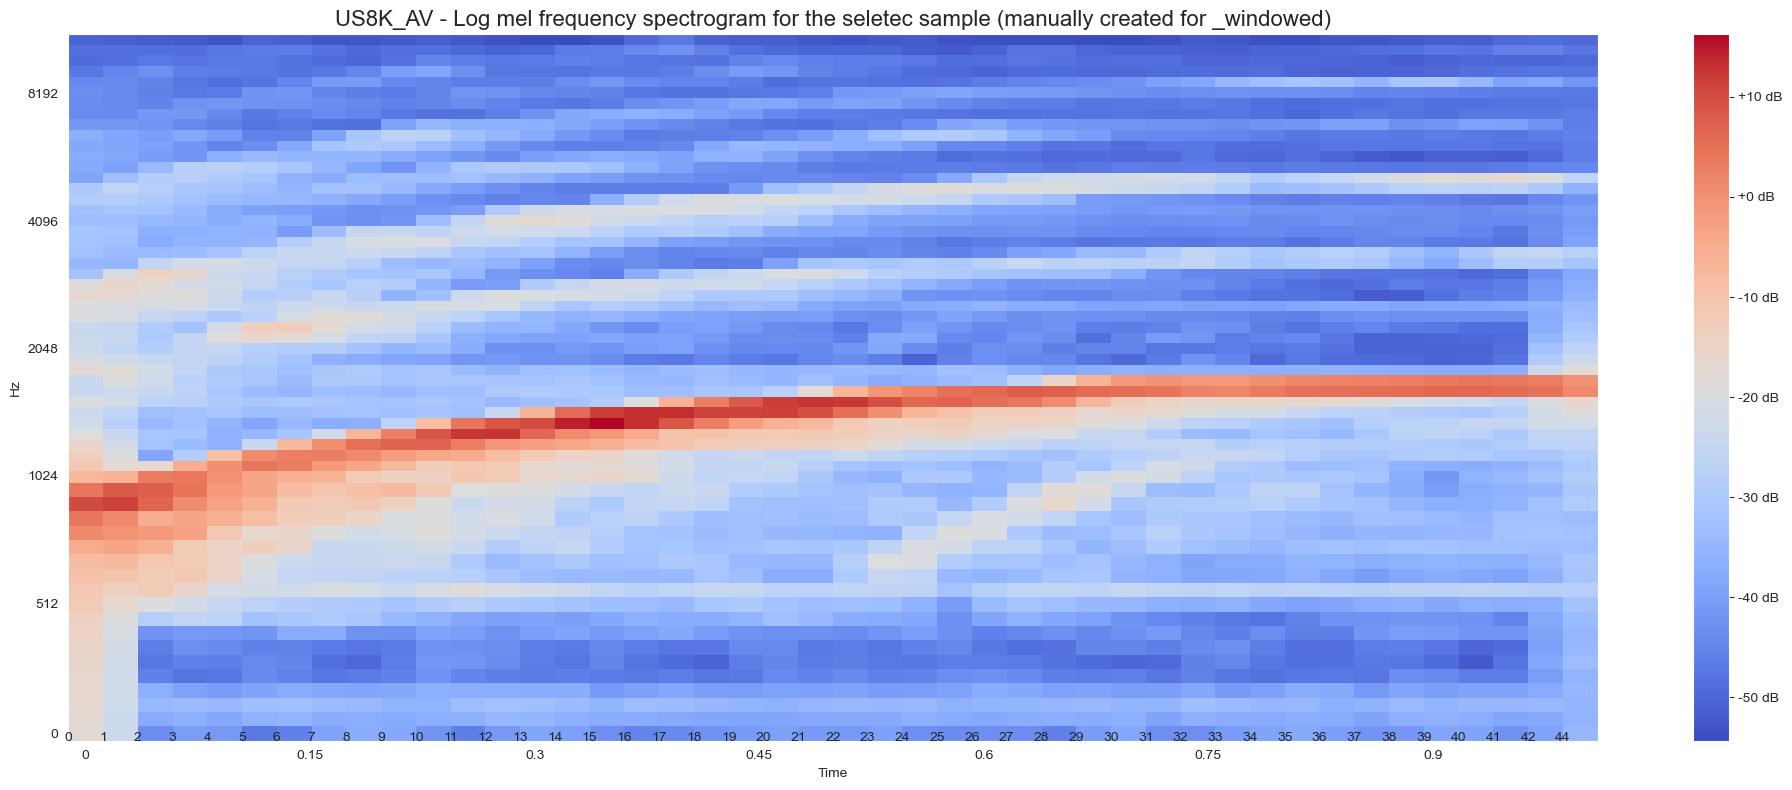

In [112]:
mel_spectrogram_aug(Xdb, '(manually created for ' + model_surname + ')')

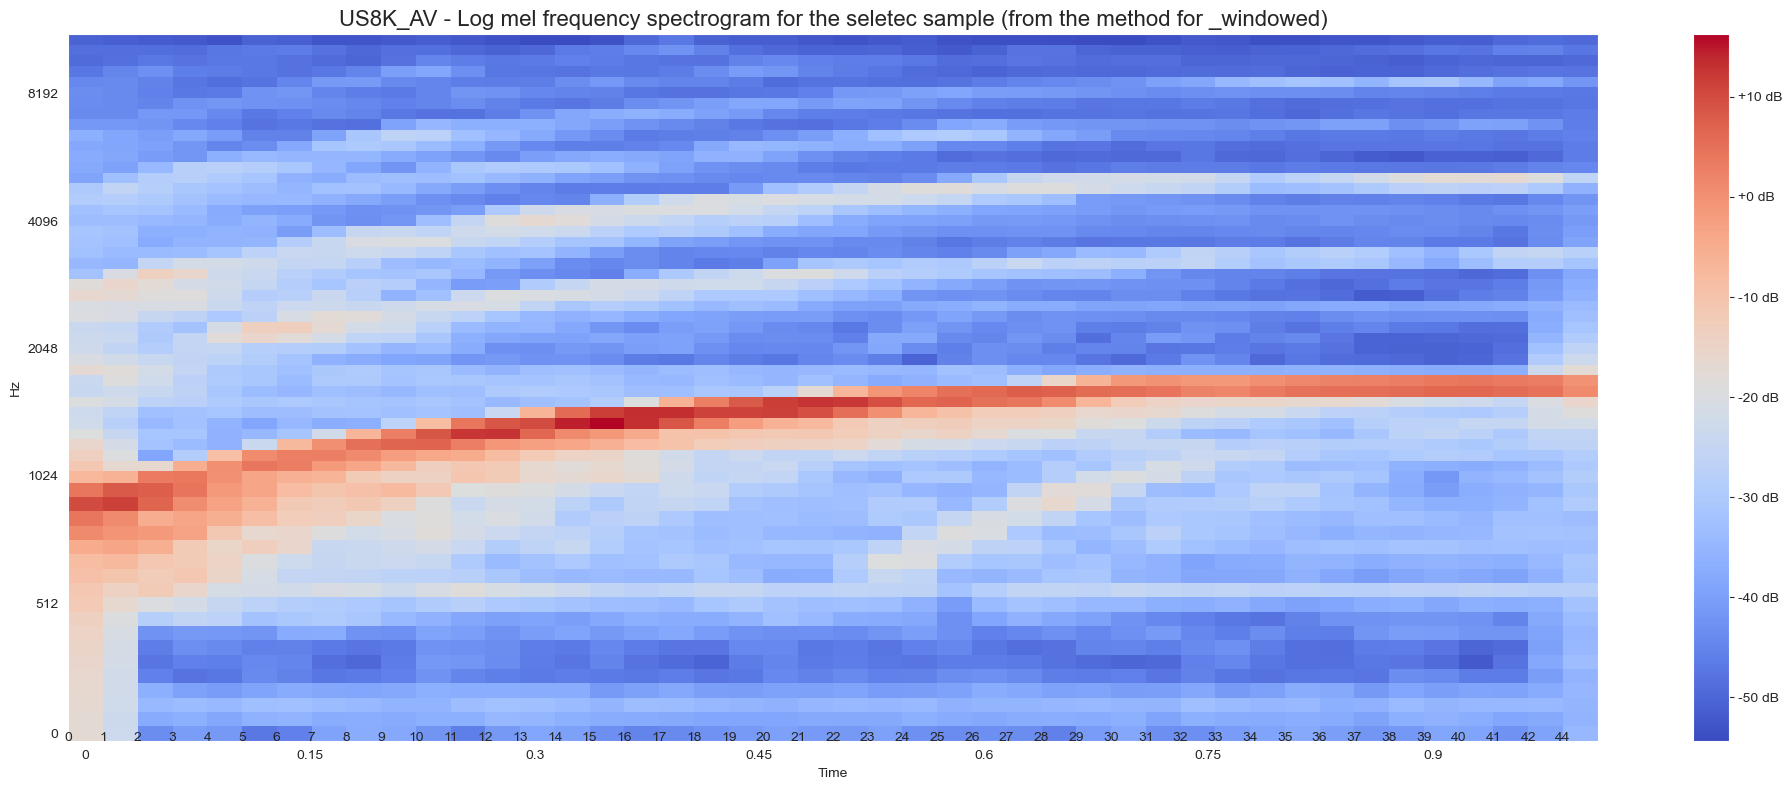

In [113]:
mel_spectrogram_aug(X_mel, '(from the method for ' + model_surname + ')')

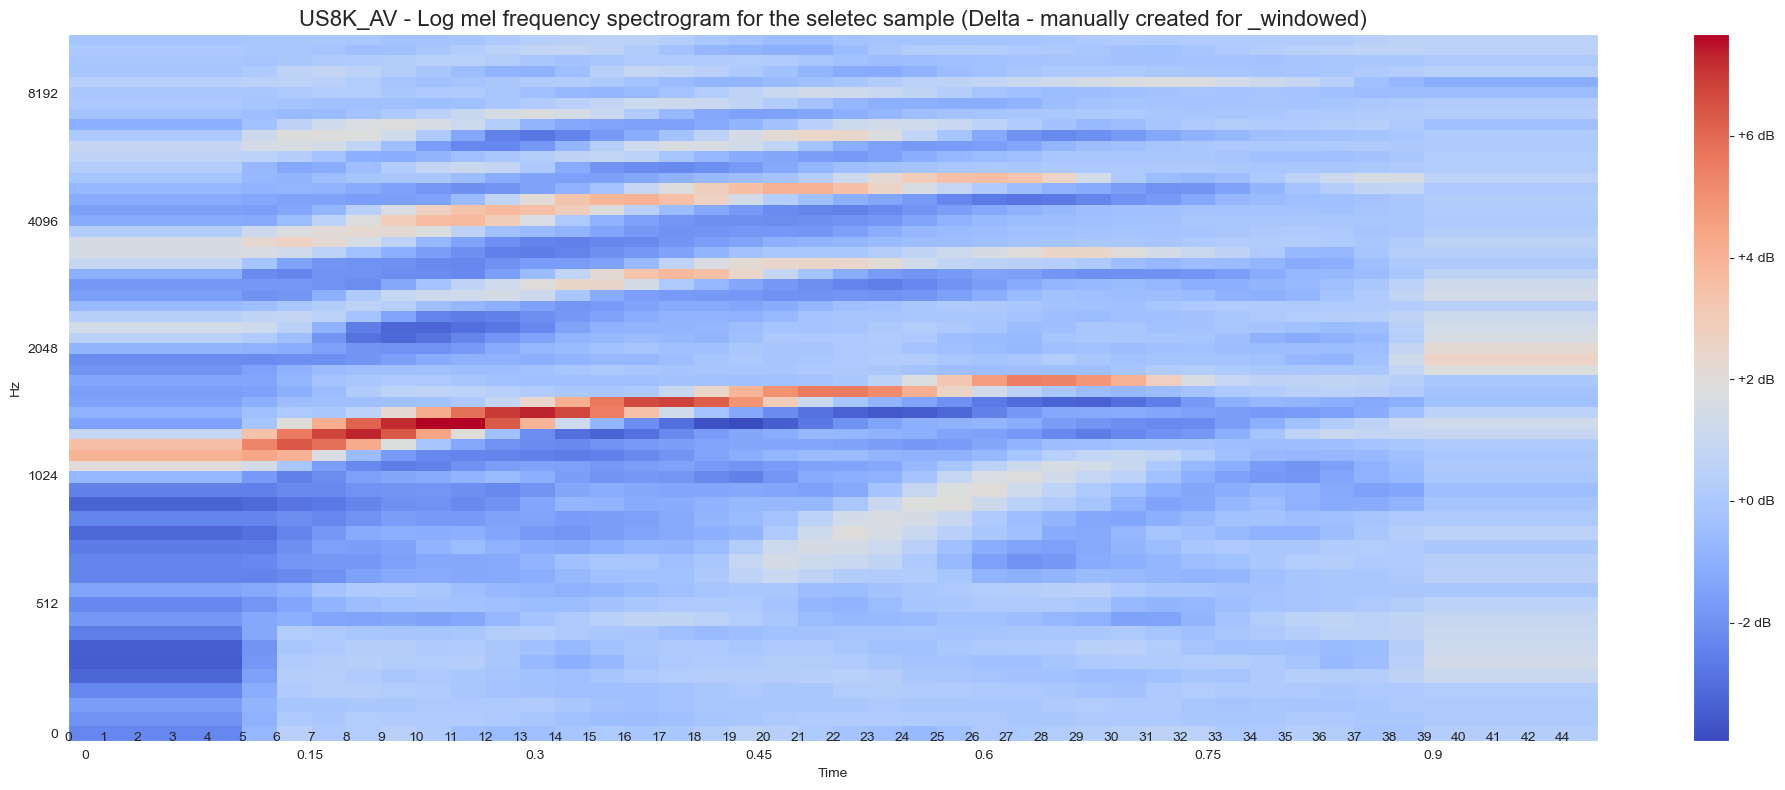

In [114]:
mel_spectrogram_aug(Xdb_delta, '(Delta - manually created for ' + model_surname + ')')

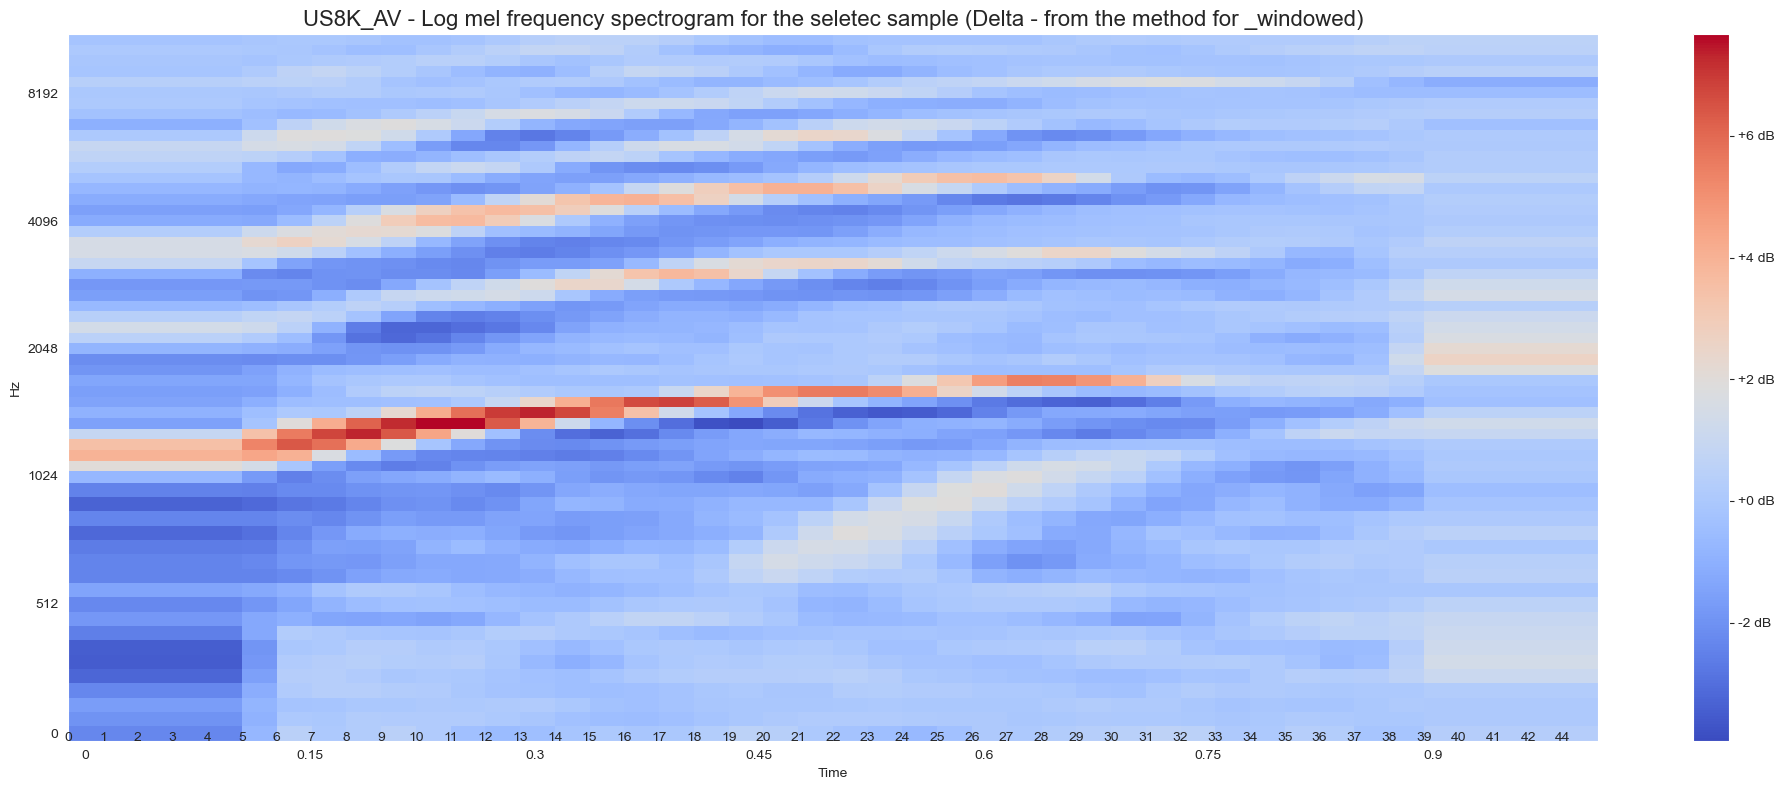

In [115]:
mel_spectrogram_aug(X_mel_delta, '(Delta - from the method for ' + model_surname + ')')

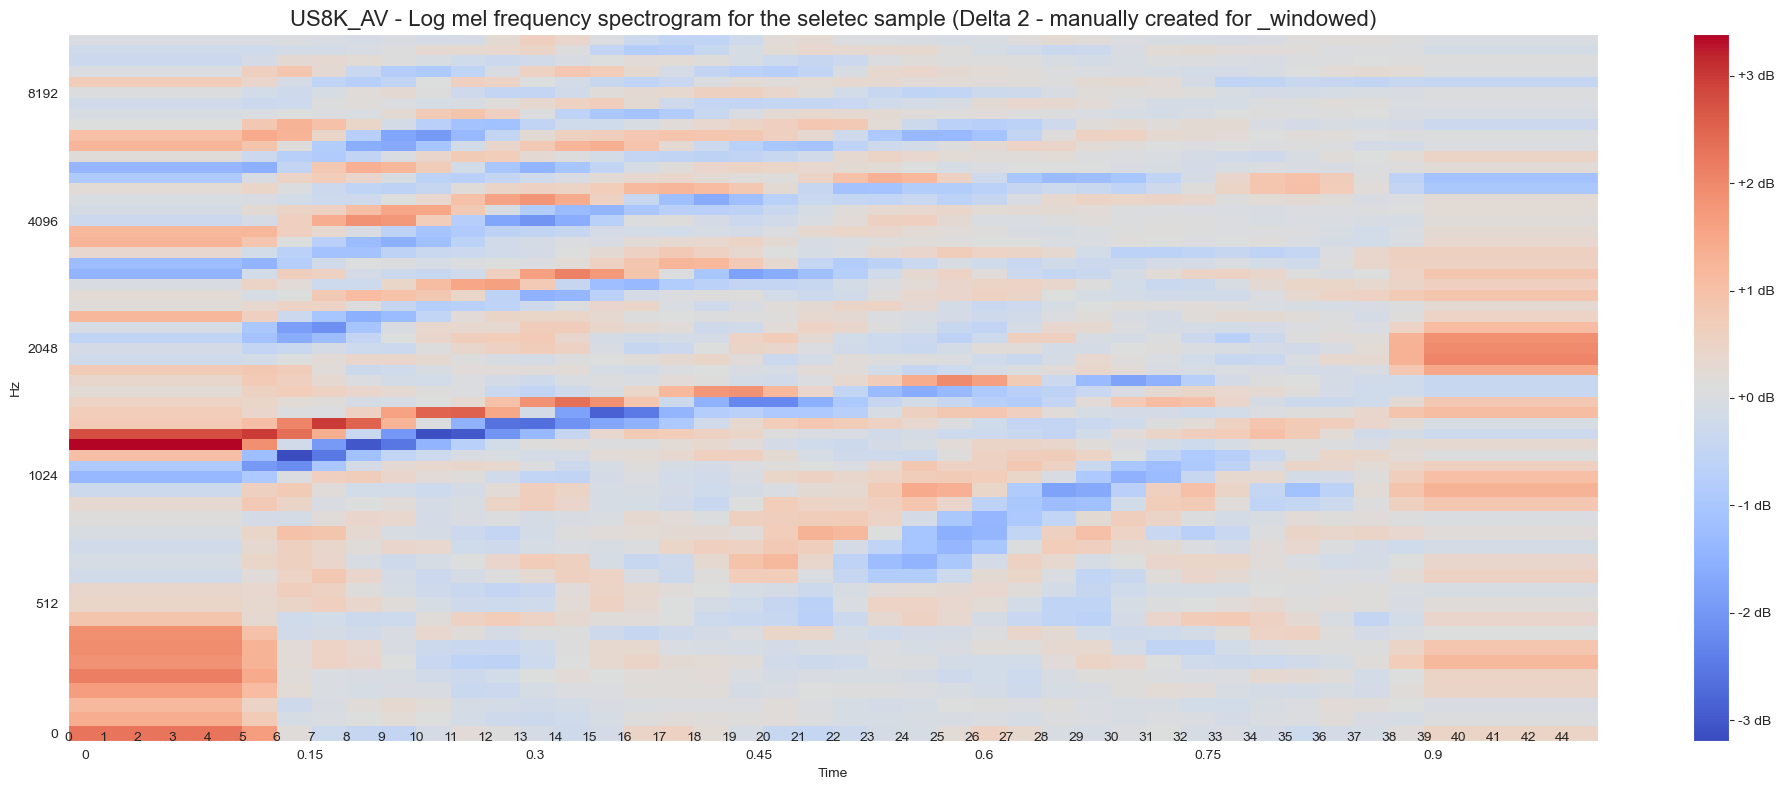

In [116]:
mel_spectrogram_aug(Xdb_delta2, '(Delta 2 - manually created for ' + model_surname + ')')

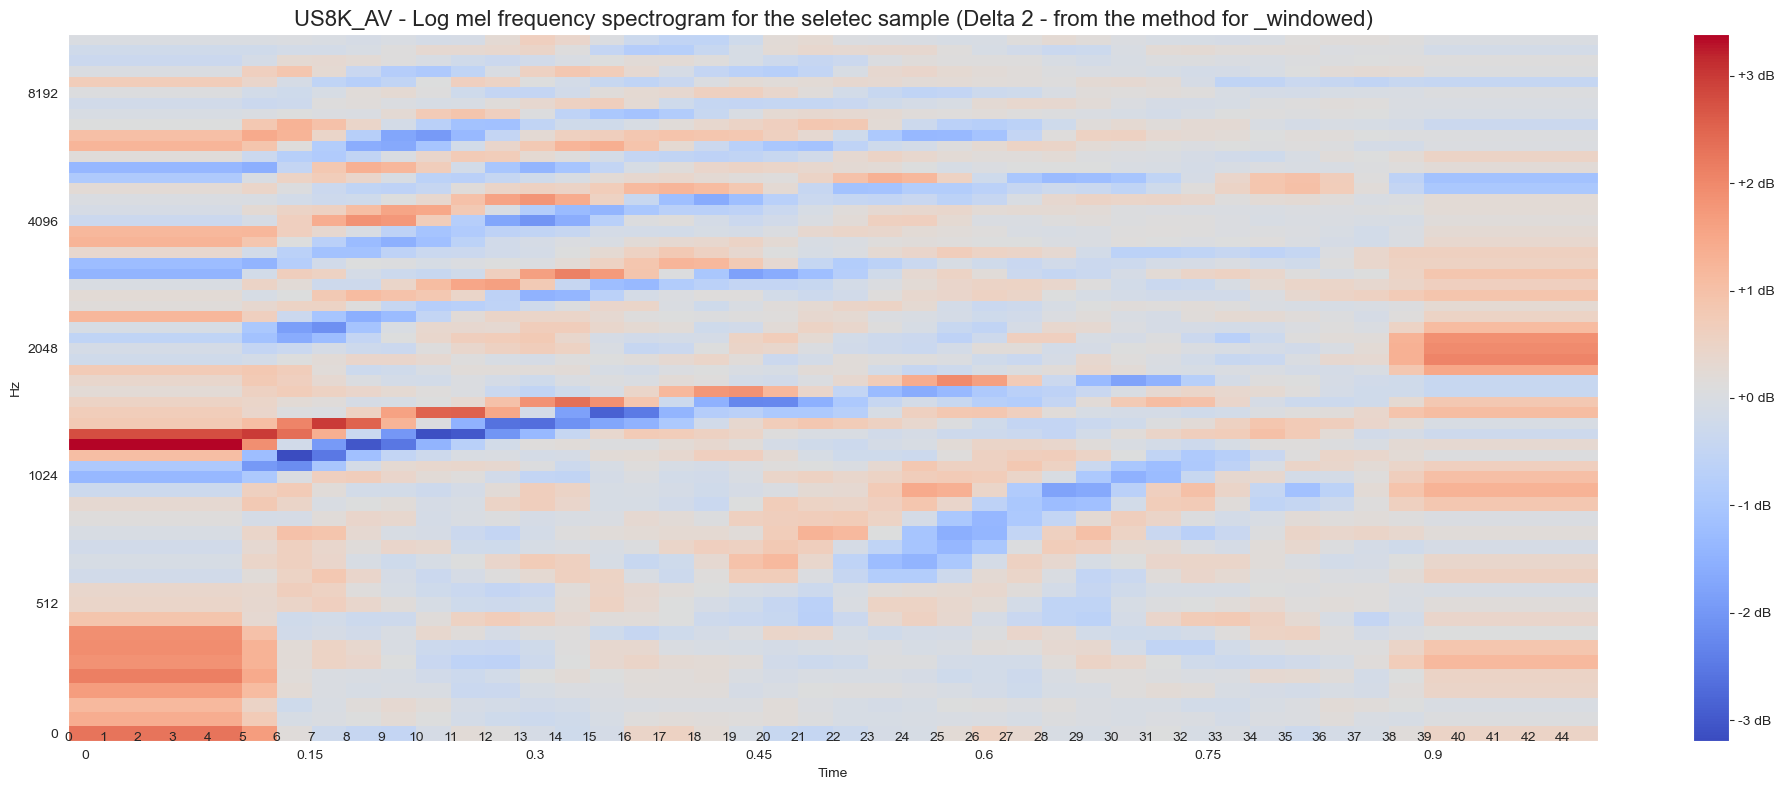

In [117]:
mel_spectrogram_aug(X_mel_delta2, '(Delta 2 - from the method for ' + model_surname + ')')

In [118]:
(Xdb == X_mel).all()

True

In [119]:
(Xdb_delta == X_mel_delta.astype(np.float32)).all()

True

In [120]:
(Xdb_delta2 == X_mel_delta2.astype(np.float32)).all()

True

## End of the notebook
